<b>Machine Learning I / Lab 1 EDA</b>
<br><b>Authors:</b> Fabio Savorgnon, Tina Pai, Paritosh Rai, Ellen Lull
<br><b>Data set from:</b> https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# Business Understanding

According to the American Heart Association, approximately 43 percent of adults in the of the United States have Cardiac Heart Disease (CHD) events. Of these events 55 percent of men and 51 percent had fatal events.   Non-fatal myocardial infraction (MI) occurred for 35 percent of the men and 31 percent of the women who have CHD.  In those with established CHD 30% had more than 1 recurrent event. Therefore, we chose a cardiac dataset to analyze the factors that are related to cardiac events, like hypertension, smoking, and cholesterol among others factors. 

The data we picked does not specify in its source about why the data was collected, but we assume that the data was collected to put together factors relating to heart disease.

In this report, our goal was to relationships among the attributes and how they relate to cardiac events. After some initial data analysis, our strategy was to discuss the variables in the data with our subject matter expert. Dr. Fabio Savorgnan, on the project team, is a cardiac intensivist. We narrowed our focus down to the factors in this data, which seem to be most significant based on subject matter expert knowledge and also show a correlation to the target variable in this data. We also derived some additional variables from the data, such as Body Mass Index (BMI) and Blood pressure categories that are recognized by the American Heart Association. These additional variables provided relevant insight toward cardiac disease, according to evidence-based medicine.

The model that we think would be useful with this data will be a classification model to predict if a person has or does not have cardiac disease. Because this is a classification model, we can evaluate it with precision, recall, and F1 score. We will compare different models by evaluating AUC of the ROCs. 


# Data Meaning Type

There are 3 types of attributes:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient


**age** (Objective):    The age of the patient in days.  Values range from 10798 days (29 years) to 23713 days (about 65 years)

**height** (Objective):   The height of the patient in centimeters

**weight** (Objective):  The weight of the patient in Kilograms

**gender** (Objective):  Categorical code of 1 for woman or 2 for man

**ap_hi** (Examination):  Systolic Blood Pressure   *Integer* 

**ap_lo** (Examination):  Diastolic blood pressure   *Integer*

**cholesterol** (Examination): 1: normal, 2: above normal, 3: well above normal

**gluc**  (Examination):  Glucose  1: normal, 2: above normal, 3: well above normal

**smoke** (Subjective)   Indicator to determine whether patient smokes or not  (binary)

**alco** (Subjective): Indicator to determine if patient drinks alcohol or not (binary)

**active** (Subjective): Indicator to determine if patient is active or not (binary)

**cardio** (Examination):  Target variable to determine if heart disease is present (binary)

<b>The following are variables created within the EDA process:</b>
<br>
<br><b>age_yr</b>: Age in years.   Age (in days) / 360
<br><b>new cholesterol column</b>:  Normal (cholesterol = 1) or High (cholesterol = 2 or 3)
<br><b>new glucose column</b>:  Normal (gluc=1) or High (gluc = 2 or 3) 
<br><b>BMI</b>: Body Mass Index calculated as folows: <b> weight (in kg) / (height(in cm)/100)^2 </b>
<br>
<br><b>bmiGrp</b>: Grouping body mass index into 4 categorical groups:
<br><b>Values</b>
<br><b> 1</b>: Underweight: BMI < 18.5)
<br><b> 2</b>: Normal: BMI between 18.5 and 25
<br><b> 3</b>: Over Weight: BMI between 25 and 30
<br><b> 4</b>: Obese:  BMI  > 30
<br>
<br><b>bp</b>: Grouping blood pressure into 4 categorical groups:
<br><b> Values</b>
<br><b> 1</b>: Normal:  Systolic Blood Pressure Less than 120 and Diastolic blood pressure Less than 80
<br><b> 2</b>: Elevated:  Systolic Blood Pressure between 120 and 130 and Diastolic blood pressure Less than 80
<br><b> 3</b>: Hyper_Stage_1: Systolic Blood Pressure between 130 and 140 and Diastolic blood pressure between 80 and 90
<br><b> 4</b>: Hyper_Stage_2:  Systolic Blood Pressure greater or equal to 140 and Diastolic greater than or equal to 90
<br><b> 5</b>: Hyper_Stage_3: Systolic Blood Pressure greater than 180 and Diastolic blood pressure greater than 120



# Setup

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=';')
%matplotlib inline     
sns.set(color_codes=True)
df.head(5)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

# Data Quality

### Missing Values

There are no missing values.

In [285]:
n = df.isna().sum()
n

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Duplicate Observations

There are no duplicated observations.

In [286]:
df.duplicated(subset=None, keep='first').describe()

count     70000
unique        1
top       False
freq      70000
dtype: object

### Transforming Age Scale

Because age was in days, we change it to be in years to make it easier to understand. The age ranges from a min of 30 yrs to max of 65 yrs, which looks appropriate.

In [287]:
df['age'] = df['age']/360
df.age.describe()

count    70000.000000
mean        54.080183
std          6.853477
min         29.994444
25%         49.066667
50%         54.730556
75%         59.241667
max         65.869444
Name: age, dtype: float64

### Data Outlier

Our data outlier analysis is below.   We found that we had values in some continuous variable that should be considered errors rather than outliers.  In these cases, we omitted the bad data.  Some examples are blood pressure values of over 1000 or less than 1.   It is not possible for a human to have these values for blood pressure.  Similarly, there were values in height and weight that could not be considered valid data for a living person.    In these cases, it was not possible for us to come up with a reasonable value, so we omitted the rows from the original data.   This led to a reduction of around 17,000 rows out of 70,000 (or 24%).  

In [288]:
dfhw= df[["height", "weight","ap_hi", "ap_lo"]]
dfhw.describe()

height        weight         ap_hi         ap_lo
count  70000.000000  70000.000000  70000.000000  70000.000000
mean     164.359229     74.205690    128.817286     96.630414
std        8.210126     14.395757    154.011419    188.472530
min       55.000000     10.000000   -150.000000    -70.000000
25%      159.000000     65.000000    120.000000     80.000000
50%      165.000000     72.000000    120.000000     80.000000
75%      170.000000     82.000000    140.000000     90.000000
max      250.000000    200.000000  16020.000000  11000.000000

#### Height and Weight

Height and weight show some unreasonable values. An adult should not be >200 kg or <55 kg so we will assume those are mistakes and remove these data. An adult should also not be >200 cm or <130 cm so we will assume those are mistakes and remove these data.

Text(0.5, 1.0, 'Boxplot of Height and Weight')

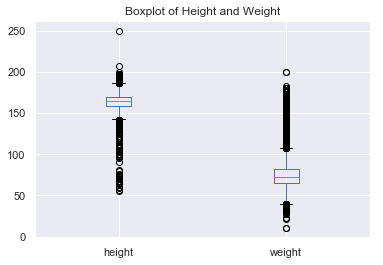

In [289]:
#Box plot of height and weight
dfs= df[["height", "weight"]]
ax = dfs.boxplot()
ax.set_title('Boxplot of Height and Weight')

In [290]:
# We address the weight with reasonable weight, the other values probably are a mistake
df = df[df["weight"] < 200]
df = df[df["weight"] > 55]

# We address the height, the other values probably are a mistake
df = df[df["height"] < 200]
df = df[df["height"] > 130]

#### Blood Pressure

Boxplots show that ap_hi (systolic blood pressure) and ap_lo (diastolic blood pressure) have some major outliers skewing the data. We can also see that these outliers are not reasonable values, based on domain knowledge by Dr. Fabio Savorgnan. It is unreasonable for systolic blood pressure to be >200 or <110, and it is unreasonable for diastolic blood pressure to be >150 or <60 so we remove them.

Text(0.5, 1.0, 'Boxplot of Blood Pressure')

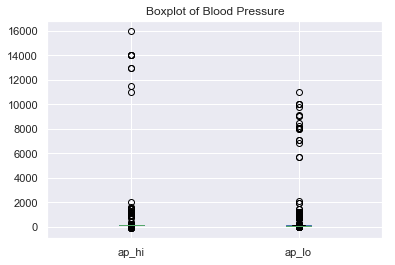

In [291]:
#Box plot of ap_hi (systolic blood pressure) and ap_low (diastolic blood pressure)
dfs= df[["ap_hi", "ap_lo"]]
ax = dfs.boxplot()
ax.set_title('Boxplot of Blood Pressure')

In [292]:
# Keeping only reasonable blood pressure measurements
df = df[df["ap_hi"] < 200]
df = df[df["ap_hi"] > 110]
df = df[df["ap_lo"] < 150]
df = df[df["ap_lo"] > 60]

#### Final Cleaned Data

Remaining after removing bad data, we have 53,053 entries left.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53053 entries, 1 to 69999
Data columns (total 13 columns):
id             53053 non-null int64
age            53053 non-null float64
gender         53053 non-null int64
height         53053 non-null int64
weight         53053 non-null float64
ap_hi          53053 non-null int64
ap_lo          53053 non-null int64
cholesterol    53053 non-null int64
gluc           53053 non-null int64
smoke          53053 non-null int64
alco           53053 non-null int64
active         53053 non-null int64
cardio         53053 non-null int64
dtypes: float64(2), int64(11)
memory usage: 5.7 MB


# Simple Statistics

### Outline of the section

This section will focus on simple statistics and capture the central tendency and spread of all the dataset variables. These fundamental statistics values give us a better understanding of the data set and how it can be leveraged to find the dataset's hidden pattern. This is more of a preparatory stage, where we kick the tires and get a good understanding of data type, data spread, data distribution, and look and feel of the values. We have used following graphical to share the data variable

1. Pie Charts for proportion of categorical variables
2. Bar Charts for mean, median, and mode of continuous variables

### Checking the types of data

Check for the datatypes to ensure integer are not stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.


In [294]:
df.dtypes

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Count number or rows and columns in dataframe 

In [295]:
df.shape       ## Dim of data frame

(53053, 13)

Show the number of rows and columns in the data set after cleaning up of data set and adding new variables that will play a critical role in data analysis. This dataset have ~53K rows and 13 columns.


### Statistical Summary
To better understand the dataset, create a Statistical Summary or 5-point summary of the cleaned-up data. This summary gives us an overview tells the descriptive summary, which includes mean, median, data percentile distribution, no. of rows, maximum and minimum value for each variable.

In [296]:
df.describe() 

id           age        gender        height        weight  \
count  53053.000000  53053.000000  53053.000000  53053.000000  53053.000000   
mean   50059.609824     54.671715      1.373739    165.069421     76.417400   
std    28829.182391      6.652249      0.483800      7.683949     13.638346   
min        1.000000     30.163889      1.000000    131.000000     56.000000   
25%    25109.000000     50.447222      1.000000    160.000000     66.000000   
50%    50079.000000     55.083333      1.000000    165.000000     74.000000   
75%    74926.000000     60.255556      2.000000    170.000000     84.000000   
max    99999.000000     65.869444      2.000000    198.000000    180.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  53053.000000  53053.000000  53053.000000  53053.000000  53053.000000   
mean     131.177294     83.863043      1.397150      1.243247      0.090136   
std       14.262603      7.724346      0.707587      0.592685      0.286380   
min      111.000000     61.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      125.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      197.000000    140.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  53053.000000  53053.000000  53053.000000  
mean       0.055661      0.799974      0.558819  
std        0.229269      0.400024      0.496533  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

#### Break down of distribution in variable

Gender: Provides distribution of Men and Women in the dataset.

In [297]:
# Count men and Women

df['gender'].value_counts()

1    33225
2    19828
Name: gender, dtype: int64

Dataset contains 1.8 times more women than men. In Pie cahrt below women are shown in blue color and men are shown in orange.


Text(0.5, 1.0, 'Data by Gender (1=Female, 2=Male)')

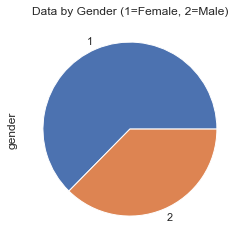

In [298]:
# gender
pc=df["gender"].value_counts().plot(kind='pie')
pc.set_title('Data by Gender (1=Female, 2=Male)')

Distribution of Cholesterol:

Cholesterol shows three values 1, 2, and 3. 1 is normal vs. as 2 and 3 demonstrates above normal and well above normal. 

In [299]:
# Count Cholesterol Levels

df['cholesterol'].value_counts()

1    38913
2     7210
3     6930
Name: cholesterol, dtype: int64

25% of people in the dataset have higher cholesterol values. values are almost equaly distributed between category 2 and 3. 


Text(0.5, 1.0, 'Cholesterol Categories (1=Low)')

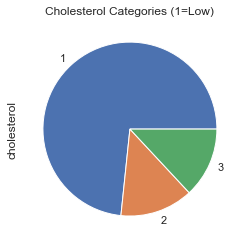

In [300]:
# Cholestrol
pc=df["cholesterol"].value_counts().plot(kind='pie')
pc.set_title('Cholesterol Categories (1=Low)')

Distribution of Glucose:

Glucose is also distributed in three part 1, 2 and 3. Similar to cholesterol 1 is normal, 2 and 3 are above normal or well above normal. 

In [301]:
# Count glucose  Levels

df['gluc'].value_counts()

1    44583
3     4435
2     4035
Name: gluc, dtype: int64


15% people have higher glucose


Text(0.5, 1.0, 'Glucose Values (1=Low)')

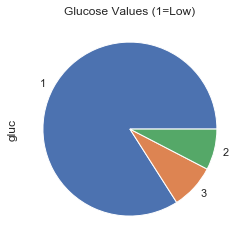

In [302]:
# glucose Pie Chart
pc=df["gluc"].value_counts().plot(kind='pie')
pc.set_title('Glucose Values (1=Low)')

Distribution of Smokers:

Smokers are distrinuted in two part smoker and non smokers. 

In [303]:
# Count smokers vs. non-smokers

df['smoke'].value_counts()

0    48271
1     4782
Name: smoke, dtype: int64


8% are smoker in data set. 


Text(0.5, 1.0, 'Patients who Smoke')

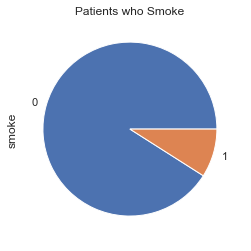

In [304]:
# Smoke Pie Chart
bc=df["smoke"].value_counts().plot(kind='pie')
bc.set_title('Patients who Smoke')

Smokers are represented in blue, and orange shows no-smoker. 

Distribution of Cardio:

1: shows people having cardio issues.

0: people have non cardio issues.

In [305]:
# Count activity people vs. non-smokers

df['cardio'].value_counts()


1    29647
0    23406
Name: cardio, dtype: int64

~50% of the samples have CVD (Cardio Vascular Disease), this is well-balanced data.

Text(0.5, 1.0, 'Cardiac Disease Indicator')

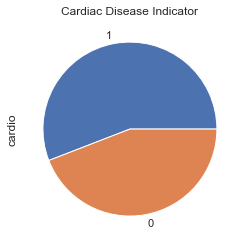

In [306]:
# Cadio Pie Chart
pc=df["cardio"].value_counts().plot(kind='pie')
pc.set_title("Cardiac Disease Indicator")

### Calculate Mean, Median and Mode

The code below calculates the mean and median, continuous variables.

The mode is calculated for both continuous and categorical variables. 

In [307]:
#Calculate Mean of continuous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].mean()

age        54.671715
height    165.069421
weight     76.417400
ap_lo      83.863043
ap_hi     131.177294
dtype: float64

In [308]:
#Calculate Median of continuous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].median()

age        55.083333
height    165.000000
weight     74.000000
ap_lo      80.000000
ap_hi     125.000000
dtype: float64

In [309]:
#Calculate Mode of continuous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi','cholesterol','gluc', 'smoke', 'alco', 'active']].mode()

age  height  weight  ap_lo  ap_hi  cholesterol  gluc  smoke  alco  \
0  56.783333   165.0    65.0   80.0  120.0          1.0   1.0    0.0   0.0   
1  60.811111     NaN     NaN    NaN    NaN          NaN   NaN    NaN   NaN   

   active  
0     1.0  
1     NaN

### Plot Mean, Median and Mode for Age in days

Code below creates a histogram and show mean, median and mode of age in days. 

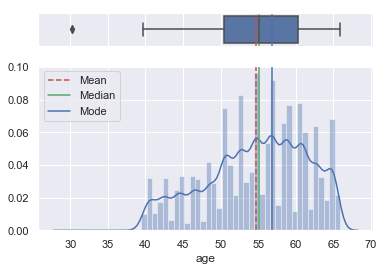

In [310]:
# Calculate and plot mean median and mode of age and spread of data

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode()[0]
# create Box Plot
sns.boxplot(df["age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["age"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are dispersed in dataset. Value calcuated above show, mean as 19469, medium as 19763 and mode as 18236. Mean and Medium are very close to each other. 

### Avg Height of Women and Men:
To figure out whether "1" stands for women or men in the gender column. Calculate the mean of height per gender. We assume that men are taller than women on average.

Average height for women in data is 161.1 cm and average height of men is 170 cmm.

Based on the outcome, women ware denoted by 1, and men are represented by 2.

In [311]:
df.groupby('gender')['height'].mean()

gender
1    161.955546
2    170.287220
Name: height, dtype: float64

### Plot Mean, Median and Mode of Height
Code below creates a histogram and show mean, median and mode of height in cm.

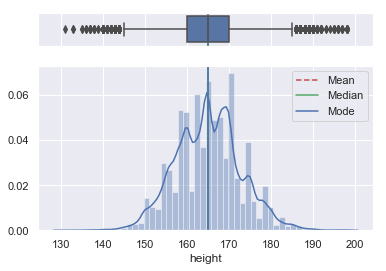

In [312]:

# Calculate and plot mean median and mode of Height and spread of data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['height'].mean()
median=df['height'].median()
mode=df['height'].mode()[0]
# create Box Plot
sns.boxplot(df["height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are nicely aligned



### Mean, Median and Mode for Weight:

Plot Mean, Median and Mode for Weight
<br>Code below creates a histogram and show mean, median and mode of weight.


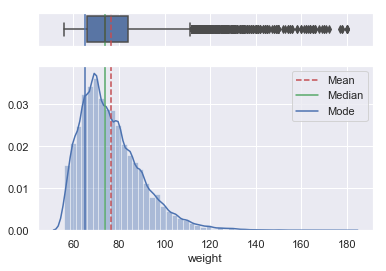

In [313]:
# Calculate and plot mean, median and mode of age and spread of data

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['weight'].mean()
median=df['weight'].median()
mode=df['weight'].mode()[0]
# create Box Plot
sns.boxplot(df["weight"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["weight"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# ceate legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are not aligned. Mean gets influanced by extreme values. As listed, calculated above mean is 74, Median is 72 and mode is 65.  As mean is higher than mode and median, it is an indication that the dataset has extreme values on higher side of weight.  The middle value of weight is at 72 and highest value of the weight value is 65. 

### Mean, Median and Mode for ap_hi (Diastolic):

Plot Mean, Median and Mode for ap_hi

Code below creates a histogram and show mean, median and mode of ap_hi.

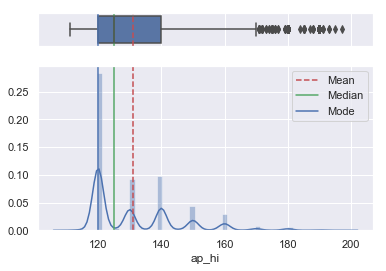

In [314]:

# Calculate and plot mean, median and mode of ap_hi and spread of data

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_hi'].mean()
median=df['ap_hi'].median()
mode=df['ap_hi'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_hi"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#create Histogram
sns.distplot(df["ap_hi"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are very close 128,120 and 120. As data is spread on higher side and Mean gets impacted by extrime values, mean is little higher than median and mode. 


### Mean, Median and Mode for ap_lo (Diastolic)

Plot Mean, Median and Mode for ap_lo

Code below creates a histogram and show mean, median and mode of ap_lo.


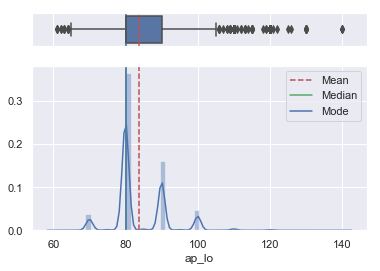

In [315]:
# Calculate and plot mean, median and mode of ap_lo and spread of data 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_lo'].mean()
median=df['ap_lo'].median()
mode=df['ap_lo'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_lo"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#Create histogram
sns.distplot(df["ap_lo"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

As calucate above Mean, Median and Mode are 96,80 and 80.  Mode and median align.   However, mean is higher as mean get infulanced by extreme values. 

### Statistical Hypothesis Testing

#### Blood Pressure

We want to see if systolic blood pressure differs in the cardio group compared to the non-cardio group. We performed an ANOVA with the two groups, which is the equivalent of the t-test, and got an F statistic of 9823 and p-value of 0.0, so we conclude that the cardio group has a different mean systolic blood pressure than the non-cardio group. We also did ANOVA with the diastolic blood pressure. We got a F statistic of 5111 and p-value of 0.0, so we conclude that the cardio group also differs from the noncardio group in mean diastolic blood pressure. 

In [316]:
#ANOVA for systolic blood pressure
from scipy.stats import f_oneway

cardio = df.ap_hi[df["cardio"]==1]
noncardio = df.ap_hi[df["cardio"]==0]

f_oneway(cardio, noncardio)

F_onewayResult(statistic=9823.43210369783, pvalue=0.0)

In [317]:
#ANOVA for diastolic blood pressure
from scipy.stats import f_oneway

cardio = df.ap_lo[df["cardio"]==1]
noncardio = df.ap_lo[df["cardio"]==0]

f_oneway(cardio, noncardio)

F_onewayResult(statistic=5111.309246473607, pvalue=0.0)

#### Age

We want to see if mean age is different between the cardio group and the non-cardio group. We performed an ANOVA test and got a F value of 2014 and a p-value of 0.0, so we conclude that the age is different between the cardio group and non-cardio group.

In [318]:
#ANOVA for age
from scipy.stats import f_oneway

cardio = df.age[df["cardio"]==1]
noncardio = df.age[df["cardio"]==0]

f_oneway(cardio, noncardio)

F_onewayResult(statistic=2013.854501240284, pvalue=0.0)

# New Features

We were able to create Body Mass Index (BMI) to assess the level of obesity of the people in our dataset. In addition, we created blood pressure categories per American Heart Association Guidelines. We also created principal components as new variables.

We did not have the ability to join new data tables to our data.   We do not know who the actual 70,000 patients in our data are, so there was no way to get additional data about them. If it were possible, we would have liked to see Cholesterol HDL/ LDL numbers in addition to the high/medium/low categories that we were given.

Furthermore, none of the the other attributes in the data contained data where it made sense to join them to a lookup or dimension table.


### BMI

We created a Body Mass Index (BMI) variable because domain knowledge tells us that high levels of obesity are related to increased chance of heart disease.

Body Mass Index (BMI) is calculated as: <b> weight (in kg) / (height(in cm)/100)^2 </b>. We bucketed people into the following categories:

* Under Weight: BMI < 18.5
* Normal Weight: 18.5 <= BMI < 25
* Over Weight: 25 <= BMI < 30
* Obese: BMI >= 30

In [319]:
# compute the body mass index based on weight and height
df['bmi'] = df['weight'] / (df['height']/100)**2

# create BMI group categorical bins
df['bmiGrp'] = np.where((df.bmi < 18.5), 1, 0)
df['bmiGrp'] = np.where((df.bmi >= 18.5) & (df.bmi < 25), 2, df.bmiGrp)
df['bmiGrp'] = np.where((df.bmi >= 25) & (df.bmi < 30), 3, df.bmiGrp)
df['bmiGrp'] = np.where((df.bmi >= 30), 4, df.bmiGrp)
df['bmiGrp1'] = pd.cut(df.bmiGrp,[0,1,2,3,4],4,labels=['Under Weight','Normal Weight','Over Weight','Obese' ]) # this creates a new variable


Most of our observations are among people who are normal weight, overweight, or obese. See the counts below.

In [320]:
#show counts of people in each BMI group
df_grouped = df.groupby(by='bmiGrp1')
df_grouped[['bmiGrp']].count()

bmiGrp
bmiGrp1              
Under Weight       37
Normal Weight   17137
Over Weight     20206
Obese           15673

### Blood Pressure

We created blood pressure categories based on ranges per the American Heart Association guidelines. According to our domain knowledge, high blood pressure increases the risk of heart attack and stroke. See the figure below from the American Heart Association about categories of blood pressure.

We bucketed blood pressure categories into the following bins:

* Normal: ap_hi < 120 and ap_lo < 80
* Elevated: 120 <= ap_hi < 130 and ap_lo < 80
* Hypertension Stage 1: 130 <= ap_hi < 140 or 80 <= ap_lo < 90
* Hypertension Stage 2: ap_hi >= 140 or ap_lo >= 90
* Hypertension Stage 3: ap_hi > 180 or ap_lo > 120


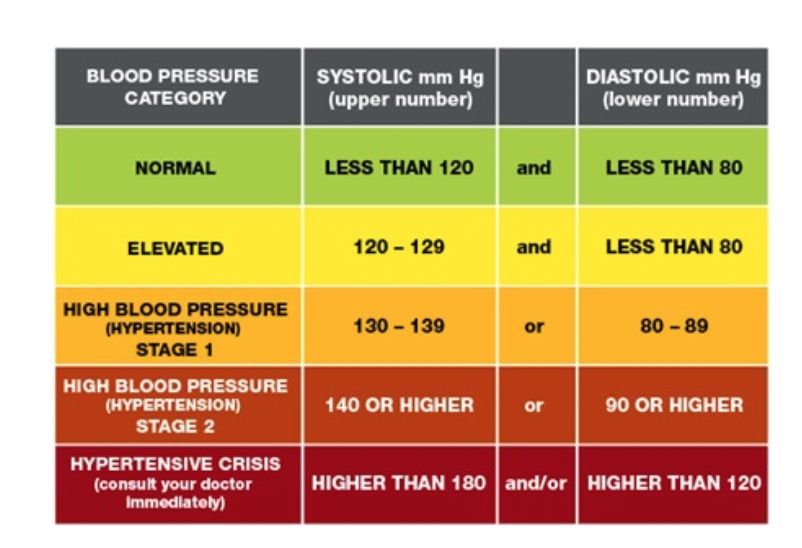

*image reference: American Heart Association*

In [321]:
# bin blood pressure groups based on the api hi/ lo variables
df['bp'] = np.where((df.ap_hi < 120) & (df.ap_lo < 80), 1, 0)
df['bp'] = np.where((df.ap_hi >= 120) & (df.ap_hi < 130) & (df.ap_lo < 80), 2, df.bp)
df['bp'] = np.where((df.ap_hi >= 130) & (df.ap_hi < 140) | ((df.ap_lo >= 80) & (df.ap_lo < 90)), 3, df.bp)
df['bp'] = np.where((df.ap_hi >= 140) | (df.ap_lo >= 90), 4, df.bp)
df['bp'] = np.where((df.ap_hi > 180) | (df.ap_lo > 120), 5, df.bp)
df['bp1'] = pd.cut(df.bp,[0,1,2,3,4,5],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable


Our dataset contains primarily people in hypertension stage 1 and stage 2. See the counts below.

In [322]:
#show counts of people in each BMI group
df_grouped = df.groupby(by='bp1')
df_grouped[['bp']].count()

bp
bp1                
Normal          177
Elevated       2472
Hyper_Stage1  28219
Hyper_Stage2  22049
Hyper_Stage3    136

We also created blood pressure levels from systolic blood pressure isolated, as well as diastolic blood pressure isolated, because there is information in medical literature that patients can have isolated systolic or diastolic high blood pressure that are associated with cardiac events.

In [323]:
df['Blood_Pressure_Level_S'] = pd.cut(df.ap_hi,[0,120,129,139,180, 200],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_S

df['Blood_Pressure_Level_D'] = pd.cut(df.ap_lo,[0,78,80,90,120,140],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_D

1        Hyper_Stage1
2              Normal
3        Hyper_Stage2
5            Elevated
6            Elevated
7        Hyper_Stage1
10           Elevated
11           Elevated
12           Elevated
14       Hyper_Stage1
15           Elevated
16             Normal
19             Normal
20           Elevated
21           Elevated
22       Hyper_Stage1
24       Hyper_Stage1
25       Hyper_Stage2
26       Hyper_Stage1
27           Elevated
28           Elevated
29             Normal
30           Elevated
31       Hyper_Stage1
33       Hyper_Stage1
34       Hyper_Stage1
36           Elevated
37       Hyper_Stage1
38           Elevated
39       Hyper_Stage1
             ...     
69963    Hyper_Stage1
69964        Elevated
69965        Elevated
69966        Elevated
69969        Elevated
69970        Elevated
69971        Elevated
69972    Hyper_Stage1
69973        Elevated
69974        Elevated
69975        Elevated
69976        Elevated
69977        Elevated
69979    Hyper_Stage2
69981    H

### Principal Components

We created principal components from our variables and kept the first two principal components. As we will show in our Visualize Attributes section, the principal components capture the split between those with heart disease and those without heart disease well.

The first principal component captures 36% of the variance in the data. The second principal component captures 25% of the variance in the data. The chart below shows the first few observations' principal components.

In [324]:
#scale the data
from sklearn.preprocessing import StandardScaler

df_continuous = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
scaler = StandardScaler()
scaler.fit(df_continuous)
df_scaled = pd.DataFrame(scaler.transform(df_continuous))

#PCA with scaled data
from sklearn.decomposition import PCA

X = df_scaled
y = df.cardio

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print("Percent Variance Explained")
print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca)

df_pca.head()

Percent Variance Explained
[0.36093009 0.2506096 ]


0         1
0  1.176529 -0.734042
1 -1.584512 -0.234259
2  2.205832  0.649648
3 -0.905054 -1.965919
4  0.215489 -0.462718

# Visualize Attributes

Our most important attributes are blood pressure, BMI, cholesterol, glucose, age, and principal components. These features each are able to capture differences between those with and without heart disease.

### Blood Pressure

In the normal blood pressure level group, only 22% have heart attack. However, in the hypertension stage 2 group, the proportion goes up to 80% having heart attack. In hypertension stage 3, 82% have heart attack. It is clear that those with higher levels of blood pressure have increased likelihood of heart disease.This finding is similar to the evidence base medicine literature.

Text(0.5, 1.0, 'Cardiac Event and Blood Pressure')

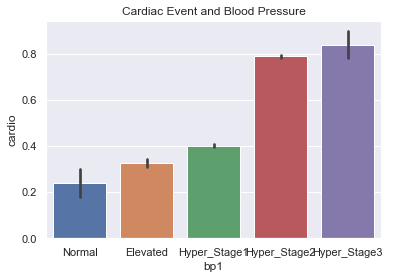

In [325]:
#bar plot blood pressure levels percent having cardiac disease 
sns.barplot(x='bp1', y='cardio', data=df, saturation=0.8)
plt.title('Cardiac Event and Blood Pressure')

### BMI

Comparing our BMI groups by their proportions having heart disease, we can see that BMI is a useful indicator for heart disease. The obese group has 65% of its people with heart disease. In comparison, the underweight group has only 42% with heart disease.This finding is also similar to the evidence base medicine literature.

Text(0.5, 1.0, 'Cardiac Event and BMI')

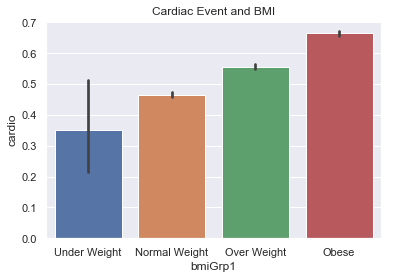

In [326]:
sns.barplot(x='bmiGrp1', y='cardio', data=df, saturation=0.8)
plt.title('Cardiac Event and BMI')

### Cholesterol

Cholesterol values over 1 seem to have an impact on cardiovascular disease.

Text(0.5, 0, 'Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

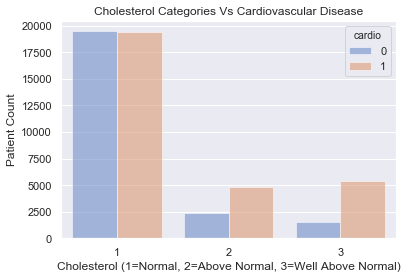

In [327]:
bc=sns.countplot(x="cholesterol", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Cholesterol Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

### Glucose

Glucose above normal categories seem to be more common among those with cardiovascular disease than those without.

Text(0.5, 0, 'Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

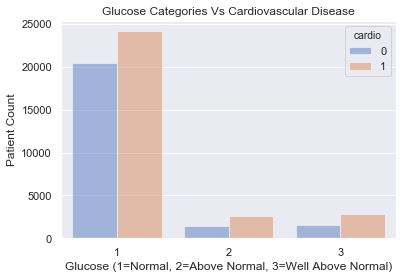

In [328]:
bc=sns.countplot(x="gluc", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Glucose Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

### Age

The age distribution of those with cardiac disease is older than the noncardio population.

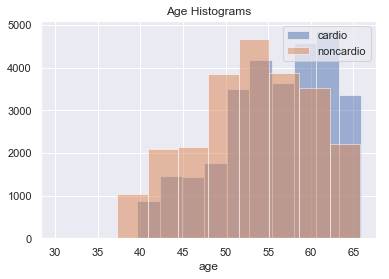

In [329]:
cardio = df[df["cardio"]==1]
noncardio = df[df["cardio"]==0]


plt.hist(cardio['age'], alpha=0.5, label='cardio')
plt.hist(noncardio['age'], alpha=0.5, label='noncardio')
plt.title("Age Histograms")
plt.xlabel("age")
plt.legend(loc='upper right')
plt.show()

### Principal Components

The first two principal components show a clear split on those with cardiac disease and those without.

Text(0, 0.5, 'PC2')

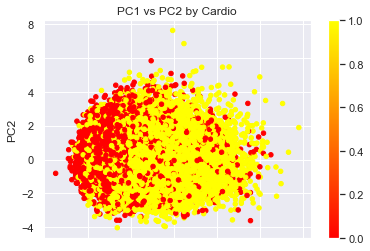

In [330]:
#plot of PC1 and PC2 colored by cardio
ax = df_pca.plot.scatter(0, 1, c=y, colormap='autumn')
ax.set_title('PC1 vs PC2 by Cardio')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Explore Joint Attributes

In this section, variables will be compared with each other to explore the relationships between attributes. Attributes will be reviewed using scatterplots, correlation, cross-tabulation, group-wise averages, etc. Certain interesting relationships will also be discussed.

### HeatMap

Heat Map is a type of plot which is necessary when we need to find the dependent variables.
Age show some correlation with glucose, ap_lo, ap_hi, and cholesterol. These variables' values are expected to go up with age. Cardio also offer a higher correlation with age, i.e., people at higher age are expected to get CVD. Alcohol and Smoking show a higher correlation with gender. Men smoke and drink alcohol more than women. However, cardio and smoke do not indicate a high correlation. Smoking is related to height too (maybe a good example of correlation do not lead to causation)
Weight shows a relationship with ap_lo and ap_hi. Also, ap_lo and ap_hi show 70% correlation. A strong relationship is observed between cholesterol and glucose, as well.

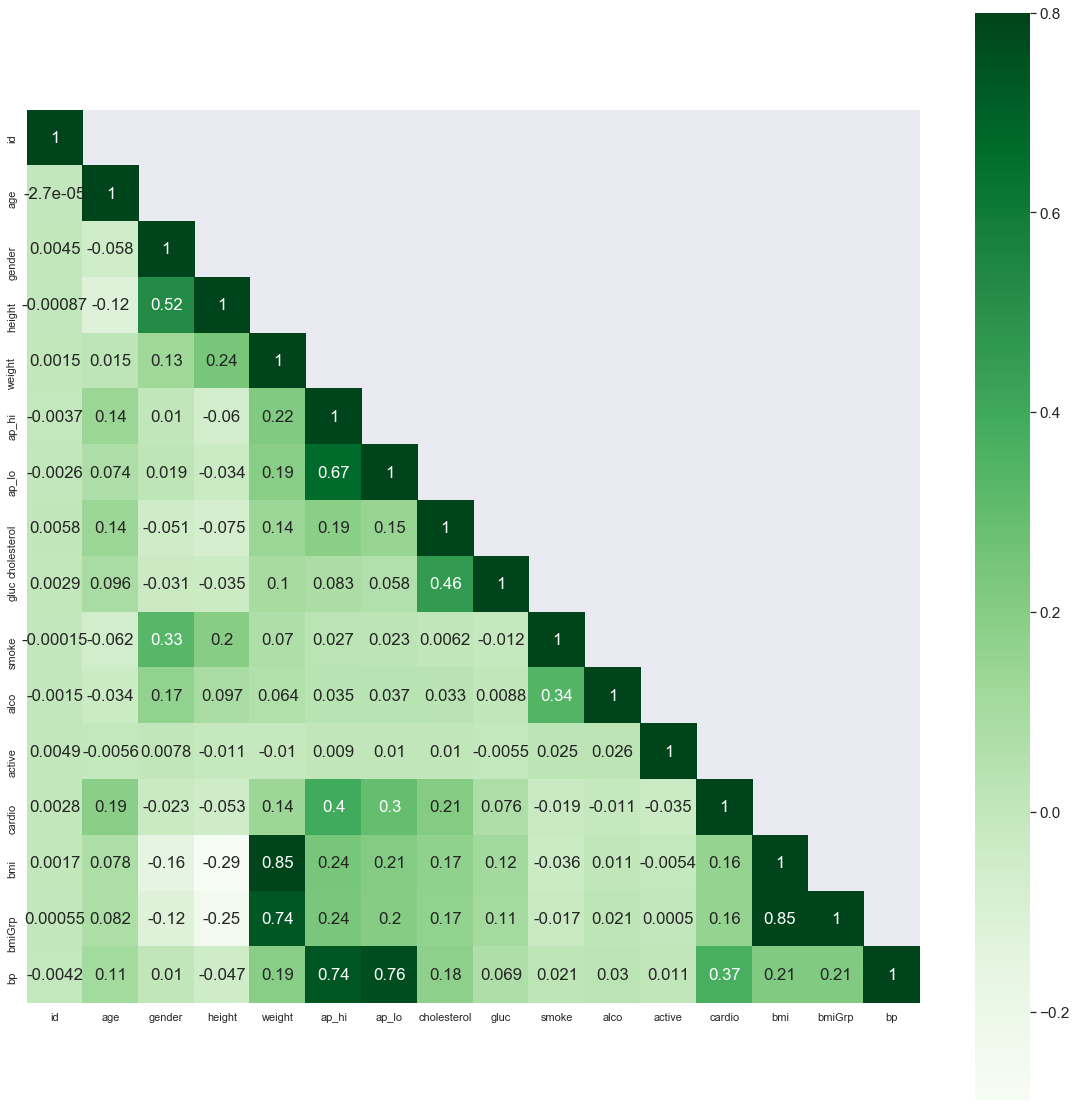

In [48]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.set(font_scale=1.4)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=0.8, square=True,annot=True)

### Bivariate Analysis
Categorical variables by target class: It is evident that patients with CVD have higher cholesterol and blood glucose level (look at Red and Green bars), also they are less active (higher blue and lower orange bar).

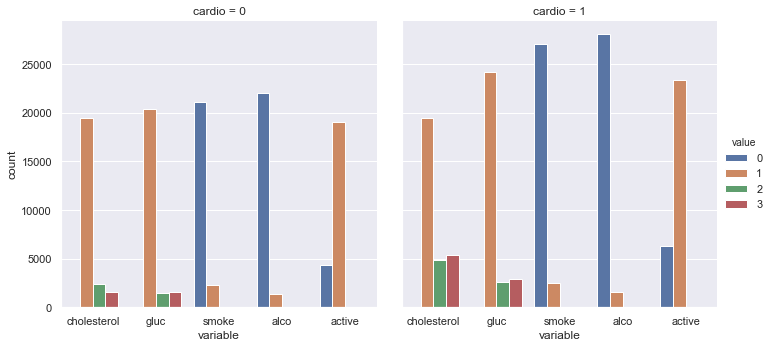

In [331]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");


### Correlation of all the variable with cardio

In [208]:
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)

id             0.002808
age            0.191239
gender        -0.023324
height        -0.053357
weight         0.135378
ap_hi          0.395271
ap_lo          0.296446
cholesterol    0.205732
gluc           0.075609
smoke         -0.019257
alco          -0.011291
active        -0.034716
bmi            0.159923
bmiGrp         0.157239
bp             0.372455
Name: cardio, dtype: float64


The variables: Age, Weight and Cholestrol show higest correlation. 


### Scatter Plot Age vs. Weight

As evident from the table above, Age and weight are continuous variables and show a higher correlation to cardio. We created a scatter plot. We can see as we move right to scatter plat orange dots density increase compare to blue dots. Whereas on the bottom left of the graph, higher blue dot density is observed.  

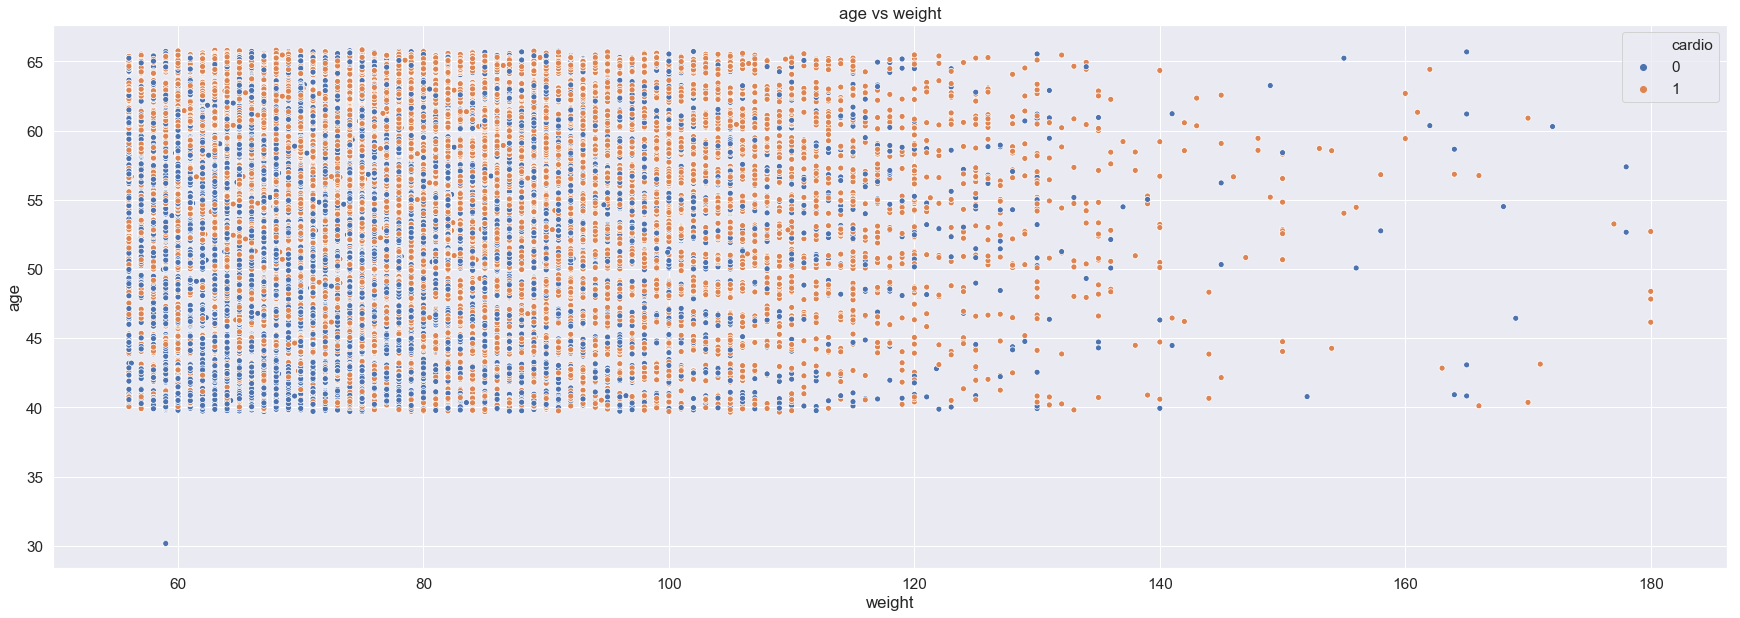

In [51]:
fig, ax = plt.subplots(1,1, figsize = (30,10))
sns.scatterplot(df['weight'],df['age'],ax=ax,hue=df['cardio'])
ax.set_title('age vs weight')
plt.show()

Higher age and more weight shows high probality of CVD relation

### Pair Plot
The pair plot is the matrix where each variable is ploted against the other variables. This is done to see the relationship against each of them. 

The diagonal plot which showcases the histogram. The histograms show the PDF/Probability distribution of a single variable.
The upper triangle and lower triangle show us the pairwise scatter plots.
The scatter plots show us the relationships between the features. These upper and lower triangles are the replicas of each other.

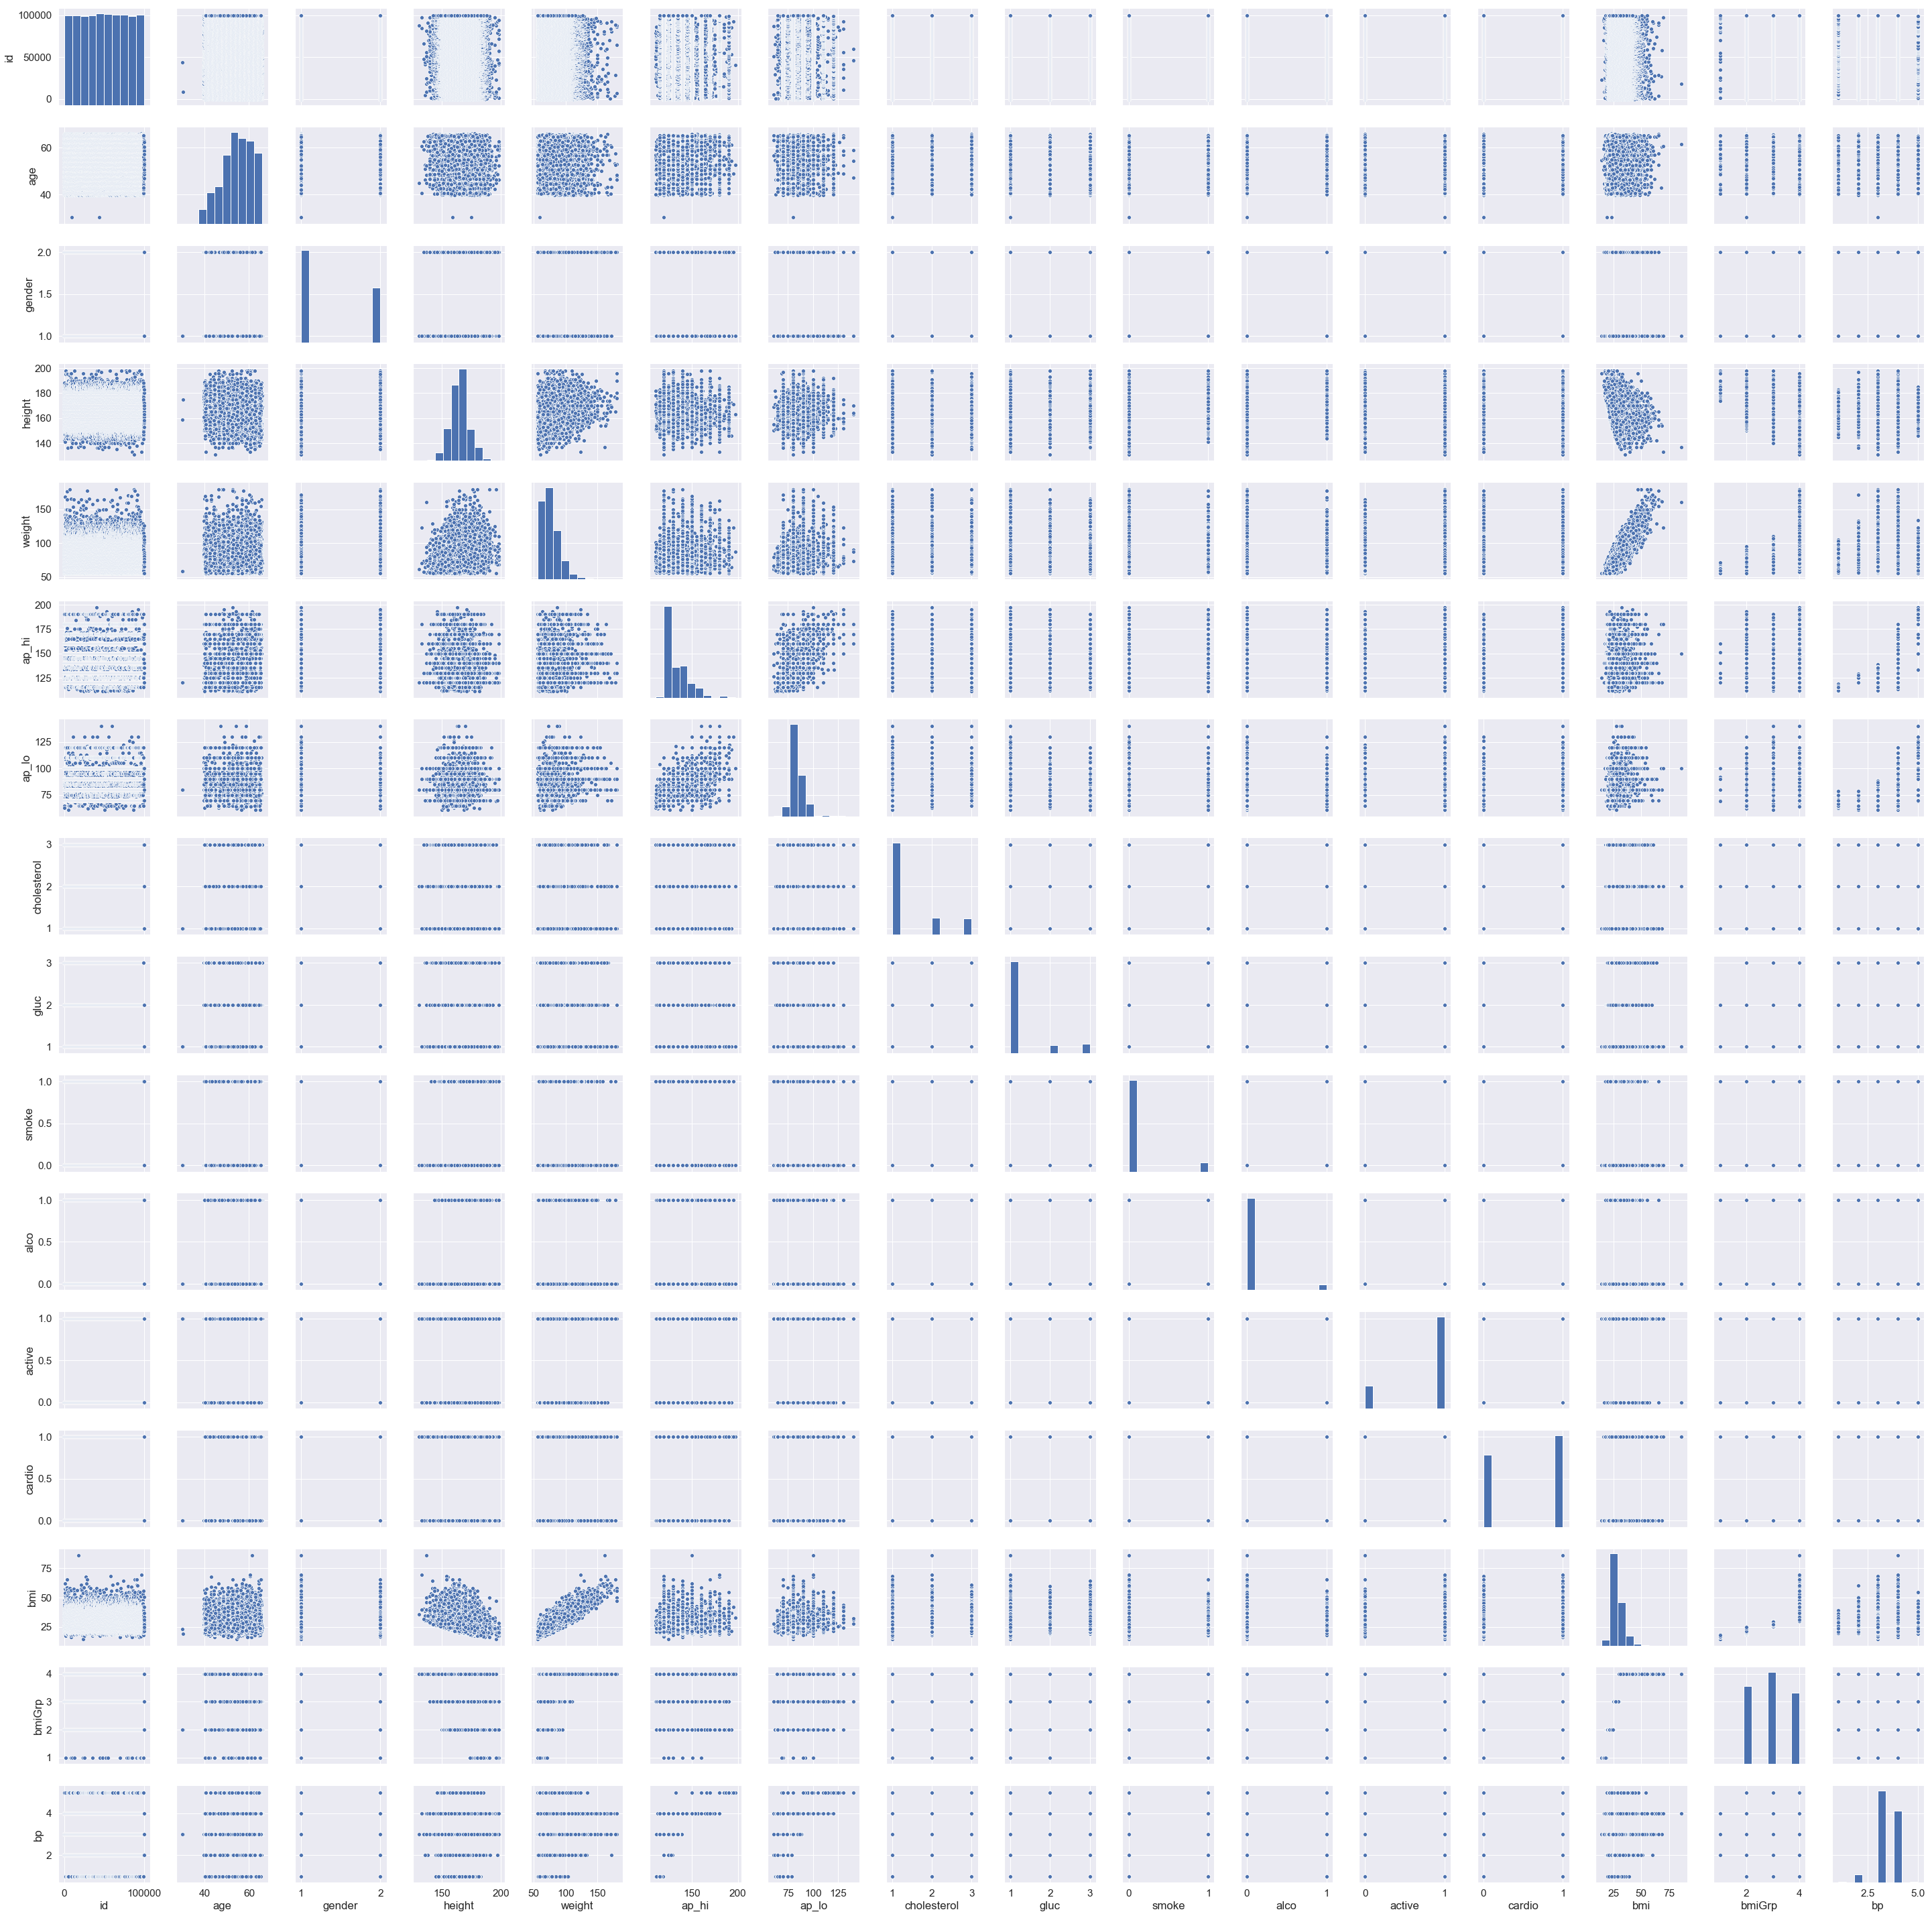

In [52]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)


### Pair Plot using cardio grouping

These pair plots are very similar to the plot above; however, scatter plots are grouped against the target variable. In our case, cardio is chosen as the target variable.

C:\Users\parit\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\parit\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


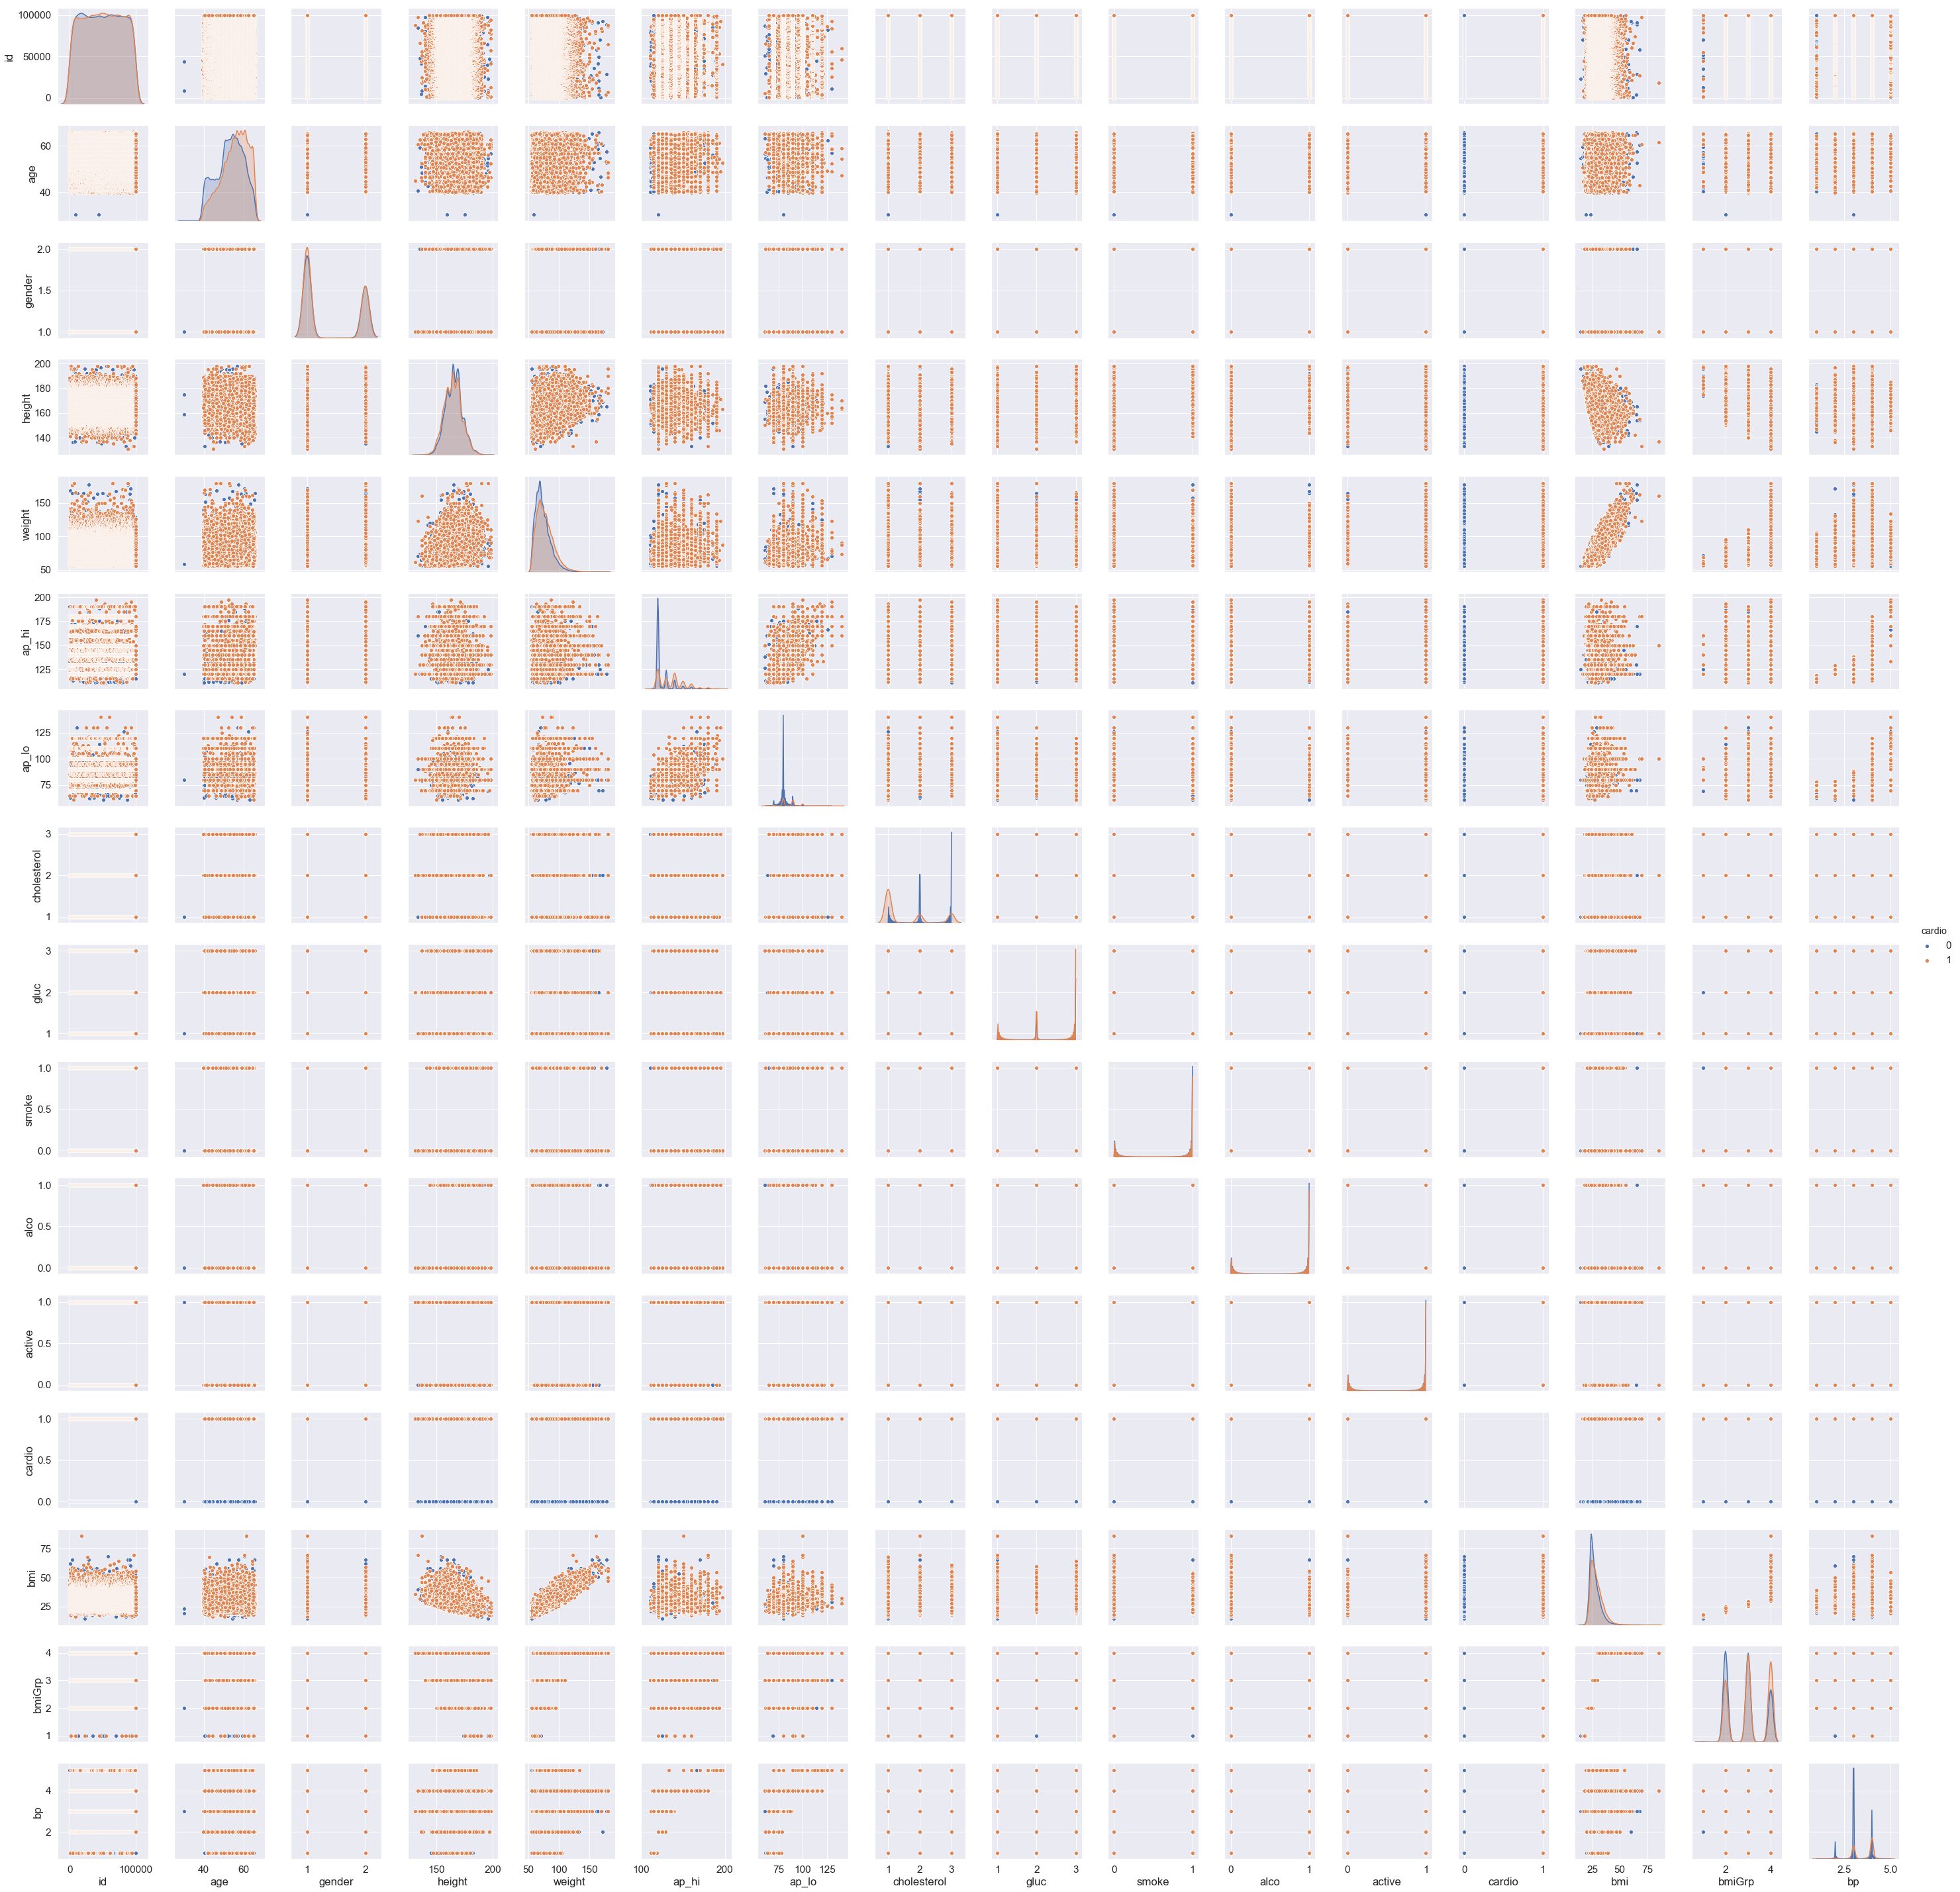

In [53]:
sns.pairplot(df, hue = 'cardio')

### BMI, alcohol, gender, and cardio

This is a multi dimentional Box plot. This shows gender, BMI (Height and Weight), alcohol and cardio. 

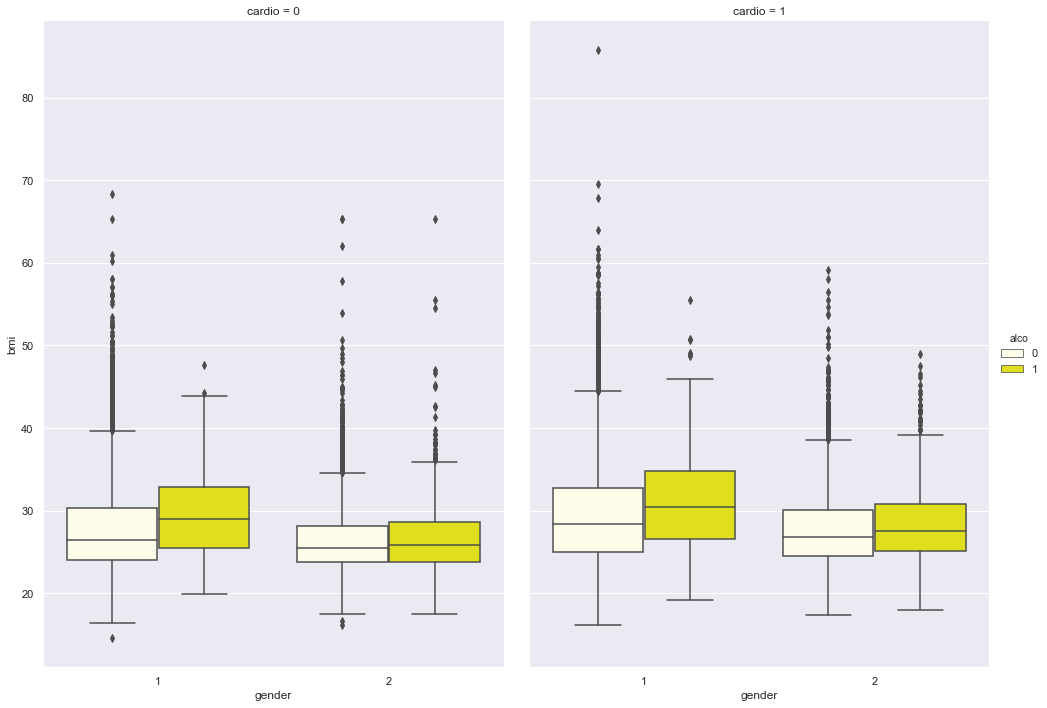

In [209]:
sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

The following are a few observations from the graph above.

* Women who drink alcohol have higher BMI than women who do not drink alcohol. However, drinking alcohol does not show much impact on the BMI of men.
* Men have lower BMI than women
* There is not much difference observed between Cardio vs. non-Cardio apparent in these attributes

### Pivot gender, alco, age and cardio

Pivot against gender, smoke, alco, and Cardio is built to show the impact of gender, alcohol, and age on Cardio.

Based on the data, cardio and age show little difference across the combinations of alcohol and gender.

In [332]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'alco'], aggfunc='mean')

age    cardio
gender alco                     
1      0     54.986504  0.567715
       1     54.307387  0.569620
2      0     54.252102  0.546438
       1     53.508986  0.521593

Based on the data, cardio and age show little difference across the combinations of smoking and gender.

In [333]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'smoke'], aggfunc='mean')

age    cardio
gender smoke                     
1      0      54.993200  0.567846
       1      53.549857  0.563055
2      0      54.398289  0.549234
       1      53.344192  0.523821

#### Interesting Finding

The fact that we found little difference across smoking, alcohol, and gender was surprising to us due to our expectations, which makes it an important negative finding.

### Cross Tabulation between Smoke and Alcohol

In [334]:
pd.crosstab(df['smoke'], df['alco'])

alco       0     1
smoke             
0      46780  1491
1       3320  1462

In given data set most of the people neighter smoke or drink alcohol (~88%) only only ~2.5% smoke and drink only ~9.5% people eiher smoke or drink. 

# Explore Attributes & Class

In this section we are comparing the explanatory variables against the target cardio response variable. 
In the data visualization section, we have already shown plots comparing blood pressure, Height/weight (in the form of BMI), Cholesterol, Glucose and Age.   The graphs below show the native blood pressure data as well as the smoking, alcohol and activity indicators given by the patients.

Violin plot shows the distribution of Weight for Cardio=0 and Cardio=1 groups. The plot shows that the tail of the orange side is thicker than the tail of the green side, which means that people with heaviest weight are more likely to have cardiac disease.

Text(0.5, 1.0, 'Cardiac Disease Indicator')

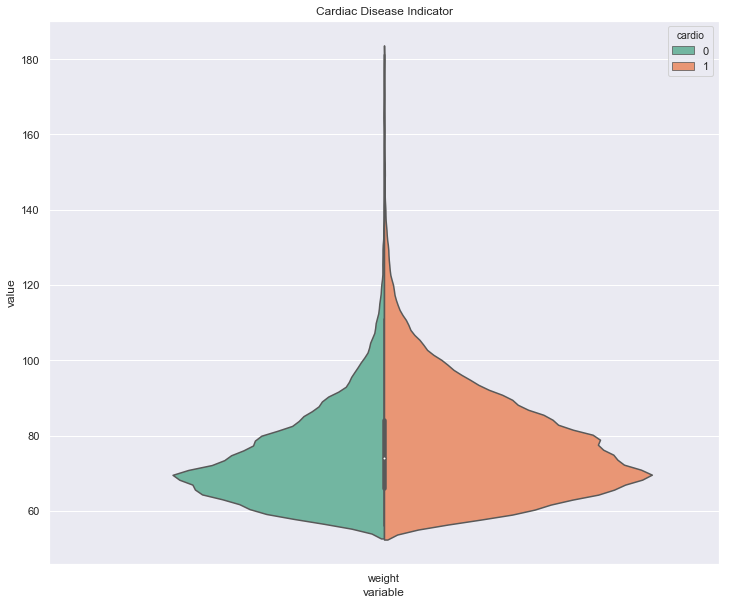

In [335]:
# Weight
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");
ax.set_title('Cardiac Disease Indicator')

This violin plot of the distribution of height shows that the distrutions of height are about the same between those who have cardiac disease and those who do not.

Text(0.5, 1.0, 'Height Distribution')

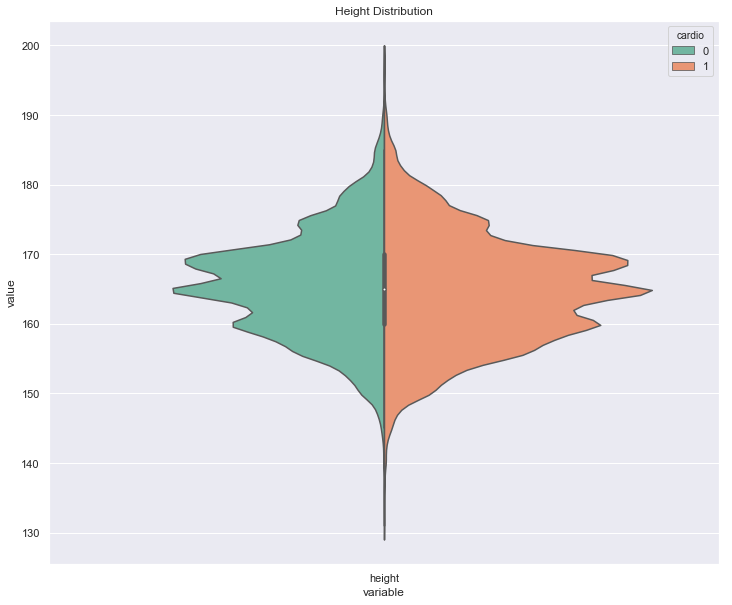

In [336]:
# Height
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");
ax.set_title("Height Distribution")


Plot Dyastolic and Systolic Blood Pressure Individually. It is important to look at the dystolic and systolic blood pressure separetely, because evidence base medicine show that isolated increased in systolic or dyastolic blood presure can be relate with cardiac events.Here we also use the American Heart Association guidelines.

These graphs show that increase blood pressure levels have higher percent of cardiac events. At Hypertension Stage 3, which is the highest level of blood pressure has >80% chance of cardiac events.

Text(0.5, 1.0, 'Cardiac Event and Systolic Blood Pressure')

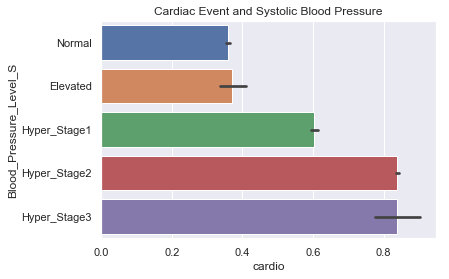

In [337]:
sns.barplot(x='cardio', y='Blood_Pressure_Level_S', data=df, saturation=0.8)
plt.title('Cardiac Event and Systolic Blood Pressure')

Text(0.5, 1.0, 'Cardiac Event and Diastolic Blood Pressure')

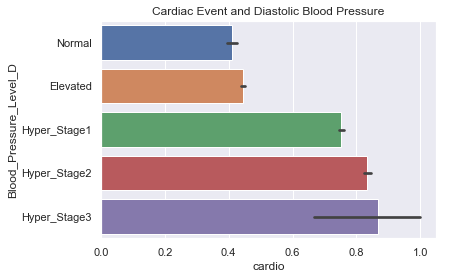

In [338]:
sns.barplot(x='cardio', y='Blood_Pressure_Level_D', data=df, saturation=0.8)
plt.title('Cardiac Event and Diastolic Blood Pressure')

Graphs of Smoking, Alcohol consumption and Activity level are below.   In this data, they did not have much effect on the response variable

Text(0.5, 0, 'Smoker')

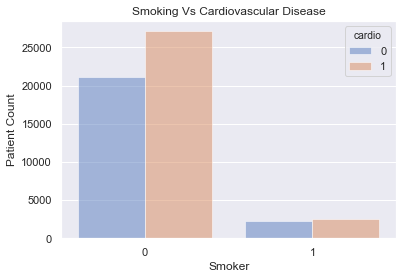

In [339]:
bc=sns.countplot(x="smoke", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Smoking Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Smoker')

In this data, smoking does not seem to have an impact on the cardiovascular disease target indicator

Text(0.5, 0, 'Drinks Alcohol')

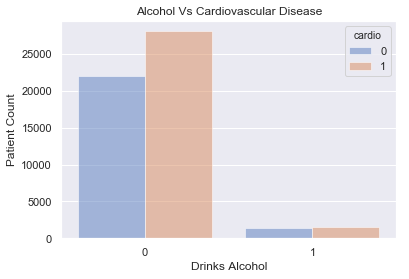

In [340]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Alcohol Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Drinks Alcohol')

Whether the patient drinks alcohol does not seem to have an impact on the cardoivascular disease variable

Text(0.5, 0, 'Active')

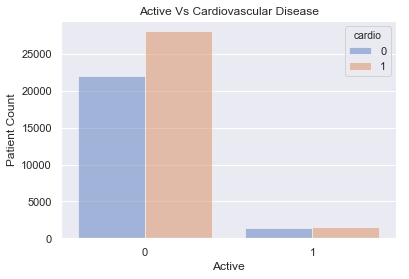

In [341]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Active Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Active')

Activity level reported by the patient does not seem to have an impact on the cardiovascular disease target variable

# Exceptional Work

In the graphs and analysis above, we spent a significant amount of time: 

* Researching and calculating the Body Mass Index. Per the recommendation of in-house subject matter expert, this important new variable was created and showed a direct correlation to our target variable cardio.
* Researching Blood Pressure categories classified by the American Heart Association and linked it to our data, which showed us results which aligned with evidence based medicine.
* Doing hypothesis tests for statistical analysis of our attributes.
* Creating numerous visualizations of attributes to express their summary statistics.
* We are also proud of our PCA dimensionality reduction of the cardio data which produced a good split of cardiac events and non events


# Conclusion

Through our EDA, we discovered a number of features which we were happy to see had correlation with the target variable. We learned that BMI, blood pressure, cholesterol, age, and glucose had direct association with the target outcome. The data did not show that activity, smoking, and alcohol have much association with the target outcome. This was an insightful experience. We look forward to using these insights to create a classification model for predicting the presence of heart disease.

# References

Data set from Kaggle: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

American Heart Association: https://www.heart.org/en/health-topics/high-blood-pressure 

 ### Logistic Regression Modeling

In [342]:
df.head(5)

id        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1   1  56.188889       1     156    85.0    140     90            3     1   
2   2  52.380556       1     165    64.0    130     70            3     1   
3   3  48.952778       2     169    82.0    150    100            1     1   
5   8  60.872222       1     151    67.0    120     80            2     2   
6   9  61.425000       1     157    93.0    130     80            3     1   

   smoke  alco  active  cardio        bmi  bmiGrp        bmiGrp1  bp  \
1      0     0       1       1  34.927679       4          Obese   4   
2      0     0       0       1  23.507805       2  Normal Weight   3   
3      0     0       1       1  28.710479       3    Over Weight   4   
5      0     0       0       0  29.384676       3    Over Weight   3   
6      0     0       1       0  37.729725       4          Obese   3   

            bp1 Blood_Pressure_Level_S Blood_Pressure_Level_D  
1  Hyper_Stage2           Hyper_Stage2           Hyper_Stage1  
2  Hyper_Stage1           Hyper_Stage1                 Normal  
3  Hyper_Stage2           Hyper_Stage2           Hyper_Stage2  
5  Hyper_Stage1                 Normal               Elevated  
6  Hyper_Stage1           Hyper_Stage1               Elevated

#### Split the data into training set and testing set using train_test_split

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
X = df[['bmi', 'age', 'ap_lo','ap_hi', 'cholesterol','gluc']]
y = df['cardio']

#### Train and fit a logistic regression model on the training set.

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [346]:
from sklearn.linear_model import LogisticRegression

In [347]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predictions and Evaluations

 Predict values for the testing data.

In [348]:
predictions = logmodel.predict(X_test)

#### classification report for the model.

In [349]:
from sklearn.metrics import classification_report

In [350]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      7005
           1       0.76      0.70      0.73      8911

   micro avg       0.71      0.71      0.71     15916
   macro avg       0.71      0.71      0.71     15916
weighted avg       0.72      0.71      0.71     15916



In [351]:
from sklearn.metrics import confusion_matrix

In [352]:
print(confusion_matrix(y_test,predictions))

[[5068 1937]
 [2663 6248]]


In [353]:
X1 = df[['ap_hi']]
y1 = df['cardio']

In [354]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [355]:
from sklearn.linear_model import LogisticRegression

In [356]:
logmodel = LogisticRegression()
logmodel.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [235]:
predictions1 = logmodel.predict(X1_test)

In [236]:
from sklearn.metrics import classification_report

In [237]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      7005
           1       0.76      0.68      0.72      8911

   micro avg       0.70      0.70      0.70     15916
   macro avg       0.70      0.70      0.70     15916
weighted avg       0.71      0.70      0.70     15916



In [238]:
X2 = df[['bmi', 'age', 'ap_lo','ap_hi', 'cholesterol','gluc','smoke','alco','active']]
y2 = df['cardio']

In [239]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=101)

In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
logmodel = LogisticRegression()
logmodel.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [242]:
predictions2 = logmodel.predict(X2_test)

In [243]:
from sklearn.metrics import classification_report

In [244]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      7005
           1       0.76      0.70      0.73      8911

   micro avg       0.71      0.71      0.71     15916
   macro avg       0.71      0.71      0.71     15916
weighted avg       0.72      0.71      0.71     15916



### Support Vector Machine (SVM)

In [245]:
Xs = df[['bmi', 'age', 'ap_lo','ap_hi', 'cholesterol','gluc','smoke','alco','active']]
ys = df['cardio']

In [246]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.30, random_state=101)

In [258]:
df.head(5)

id        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1   1  56.188889       1     156    85.0    140     90            3     1   
2   2  52.380556       1     165    64.0    130     70            3     1   
3   3  48.952778       2     169    82.0    150    100            1     1   
5   8  60.872222       1     151    67.0    120     80            2     2   
6   9  61.425000       1     157    93.0    130     80            3     1   

   smoke  alco  active  cardio        bmi  bmiGrp        bmiGrp1  bp  \
1      0     0       1       1  34.927679       4          Obese   4   
2      0     0       0       1  23.507805       2  Normal Weight   3   
3      0     0       1       1  28.710479       3    Over Weight   4   
5      0     0       0       0  29.384676       3    Over Weight   3   
6      0     0       1       0  37.729725       4          Obese   3   

            bp1 Blood_Pressure_Level_S Blood_Pressure_Level_D  
1  Hyper_Stage2           Hyper_Stage2           Hyper_Stage1  
2  Hyper_Stage1           Hyper_Stage1                 Normal  
3  Hyper_Stage2           Hyper_Stage2           Hyper_Stage2  
5  Hyper_Stage1                 Normal               Elevated  
6  Hyper_Stage1           Hyper_Stage1               Elevated

In [248]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(Xs_train)
Xs_train_std = sc.transform(Xs_train)
Xs_test_std = sc.transform(Xs_test)

#xs_train_std and x_test_std are the scaled datasets to be used in algorithms

In [249]:
# Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel ='rbf', random_state=0, gamma =0.10,C = 1.0)
svm.fit(Xs_train_std,ys_train)
print('The accuracy of SVM classifier on data is {:.2f}'.format(svm.score(Xs_train_std,ys_train)))
print('The accuracy of SVM classifier on test data is {:.2f}'.format(svm.score(Xs_test_std,ys_test)))

The accuracy of SVM classifier on data is 0.72
The accuracy of SVM classifier on test data is 0.72


In [250]:
y_pred = svm.predict(Xs_test_std)

In [251]:
print(classification_report(ys_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7005
           1       0.75      0.75      0.75      8911

   micro avg       0.72      0.72      0.72     15916
   macro avg       0.71      0.71      0.71     15916
weighted avg       0.72      0.72      0.72     15916



In [252]:
# Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel ='linear') #, random_state=0, gamma =0.10,C = 1.0)
svm.fit(Xs_train_std,ys_train)
print('The accuracy of SVM classifier on data is {:.2f}'.format(svm.score(Xs_train_std,ys_train)))
print('The accuracy of SVM classifier on test data is {:.2f}'.format(svm.score(Xs_test_std,ys_test)))

The accuracy of SVM classifier on data is 0.71
The accuracy of SVM classifier on test data is 0.71


In [253]:
Xs1 = df[['bmi', 'age', 'ap_lo','ap_hi', 'cholesterol','gluc']]
ys1 = df['cardio']

In [254]:
Xs1_train, Xs1_test, ys1_train, ys1_test = train_test_split(Xs1, ys1, test_size=0.30, random_state=101)

In [255]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(Xs1_train)
Xs1_train_std = sc.transform(Xs1_train)
Xs1_test_std = sc.transform(Xs1_test)

#xs_train_std and x_test_std are the scaled datasets to be used in algorithms

In [256]:
# Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel ='rbf', random_state=0, gamma =0.10,C = 1.0)
svm.fit(Xs1_train_std,ys1_train)
print('The accuracy of SVM classifier on data is {:.2f}'.format(svm.score(Xs1_train_std,ys1_train)))
print('The accuracy of SVM classifier on test data is {:.2f}'.format(svm.score(Xs1_test_std,ys1_test)))

The accuracy of SVM classifier on data is 0.72
The accuracy of SVM classifier on test data is 0.71


In [155]:
Xs2 = df[['ap_hi']]
ys2 = df['cardio']

In [156]:
Xs2_train, Xs2_test, ys2_train, ys2_test = train_test_split(Xs2, ys2, test_size=0.30, random_state=101)

In [157]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(Xs2_train)
Xs2_train_std = sc.transform(Xs2_train)
Xs2_test_std = sc.transform(Xs2_test)

#xs_train_std and x_test_std are the scaled datasets to be used in algorithms

In [158]:
# Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel ='linear')#, random_state=0, gamma =0.10,C = 1.0)
svm.fit(Xs2_train_std,ys2_train)
print('The accuracy of SVM classifier on data is {:.2f}'.format(svm.score(Xs2_train_std,ys2_train)))
print('The accuracy of SVM classifier on test data is {:.2f}'.format(svm.score(Xs2_test_std,ys2_test)))

The accuracy of SVM classifier on data is 0.70
The accuracy of SVM classifier on test data is 0.70
